In [1]:
import numpy
import math
import pandas as  pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from numpy import polyfit,polyval
from scipy.stats import pearsonr
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

# Problem 1:

In [2]:
def ori_data_read(cols):
    data = pd.read_excel('data_modified.xlsx',usecols=[cols]).values
    output = []
    for i in range(0,len(data)-1):
        output.append(data[len(data)-i-1][0])
    return output
#load data
Date_col = ori_data_read(1)
Context_col = ori_data_read(2)
Word_col = ori_data_read(3)
repoted_result = ori_data_read(4)
hard_mode = ori_data_read(5)
tries = []
for i in range(7):
    tries.append(ori_data_read(6+i))
data_length = len(Date_col)
date_label = []
pred_date_label = []
for i in range(data_length):
    date_label.append(i)
for i in range(data_length+60):
    pred_date_label.append(i)

In [3]:
# Do analysis between reported_result and hardmode
W1_relation = []
for i in range (data_length):
    div  = repoted_result[i]/hard_mode[i]
    W1_relation.append(div)

In [4]:
#correlation function
def R_square(x,y):
    result = pearsonr(x,y)
    return result
def normalize(input):
    temp = []
    mean = numpy.mean(input)
    std = numpy.std(input)
    for i in range(len(input)):
        temp.append((input[i]-mean)/std)
    return  temp
def difference(df,col,interval):
    temp = []
    for i in range(interval,data_length):
        value = df[col][i] - df[col][i-interval]
        temp.append(value)
    return temp
def RMSE(test,predicted):
    rmse = math.sqrt(mean_squared_error(test,predicted))
    return rmse
def GetPvalue_Pearson(x,y):
    return pearsonr(x,y)[1]

In [5]:
#we do analysis on a new data called test,it contains the frequency of the words:
data = pd.read_csv('out.csv')
test_word_col = data['word'].tolist()
test_freq_col = data['freq'].tolist()
temp = []
temp_word = []
for i in range(data_length):
    temp.append(test_freq_col[data_length-i-1])
    temp_word.append(test_word_col[data_length-i-1])
test_word_col = temp_word
test_freq_col = temp
for i in range(data_length):
    if  Word_col[i] == test_word_col[i]:
       continue
    else:
        print(Word_col[i])

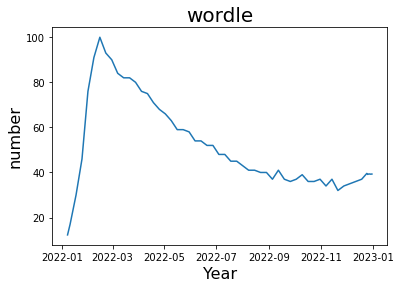

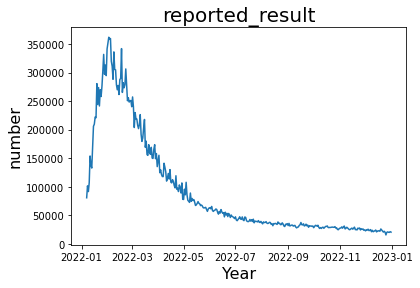

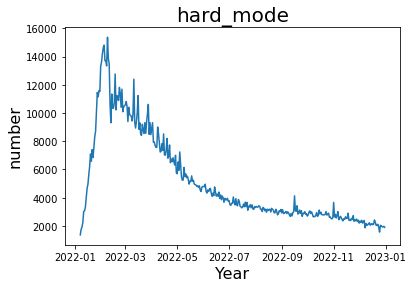

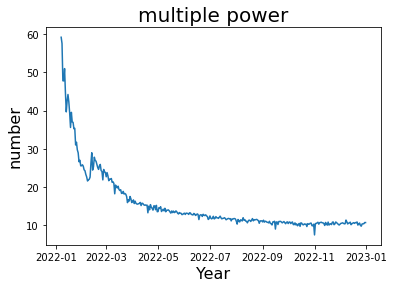

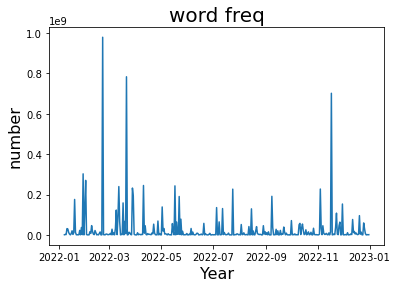

In [6]:
#we do data analysis on multiTimeline:
data = pd.read_csv('multiTimeline.csv')
temp_wordle_freq = data['wordle']
wordle_freq = [temp_wordle_freq[0]]
for i in range(1,len(temp_wordle_freq)):
    t = (temp_wordle_freq[i] - temp_wordle_freq[i-1])/7
    for m in range(7):
        wordle_freq.append(temp_wordle_freq[i-1]+m*t)
for i in range(6):
    wordle_freq.append((wordle_freq[len(wordle_freq)-1]+wordle_freq[len(wordle_freq)-2]+wordle_freq[len(wordle_freq)-3])/3)
wordle_freq = wordle_freq[5:]
plt.figure()
plt.plot(Date_col,wordle_freq,'-')
plt.xlabel("Year", fontdict={'size': 16})
plt.ylabel("number", fontdict={'size': 16})
plt.title("wordle", fontdict={'size': 20})
plt.show()

plt.figure()
plt.plot(Date_col,repoted_result,'-')
plt.xlabel("Year", fontdict={'size': 16})
plt.ylabel("number", fontdict={'size': 16})
plt.title("reported_result", fontdict={'size': 20})
plt.show()

plt.figure()
plt.plot(Date_col,hard_mode,'-')
plt.xlabel("Year", fontdict={'size': 16})
plt.ylabel("number", fontdict={'size': 16})
plt.title("hard_mode", fontdict={'size': 20})
plt.show()

plt.figure()
plt.plot(Date_col,W1_relation,'-')
plt.xlabel("Year", fontdict={'size': 16})
plt.ylabel("number", fontdict={'size': 16})
plt.title("multiple power", fontdict={'size': 20})
plt.show()


plt.figure()
plt.plot(Date_col,test_freq_col,'-')
plt.xlabel("Year", fontdict={'size': 16})
plt.ylabel("number", fontdict={'size': 16})
plt.title("word freq", fontdict={'size': 20})
plt.show()
#we do data analysis on multiTimeline:
data = pd.read_csv('multiTimeline-2.csv')
temp_wordle_freq2 = data['wordle']
wordle_data_length = len(temp_wordle_freq2)
goal = temp_wordle_freq2[wordle_data_length-1]
goal1 = 0
temp_wordle_freq2 = temp_wordle_freq2.tolist()
for i in range(14):
    sum = 0
    for m in range(14):
        sum += temp_wordle_freq2[len(temp_wordle_freq2)-1-m]
    temp_wordle_freq2.append(sum/14)
    goal1= sum/14

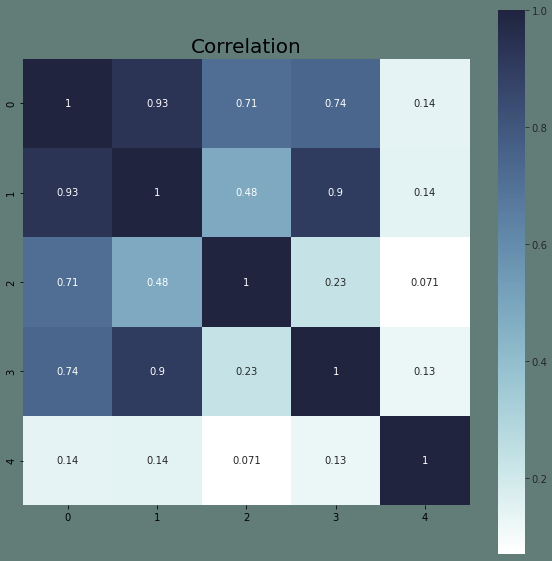

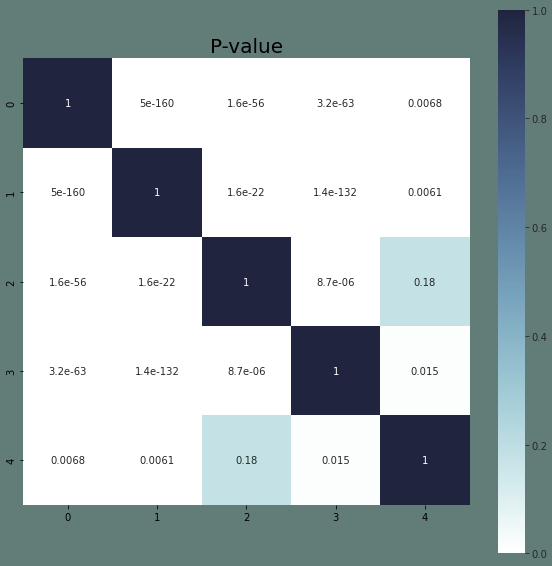

In [7]:
#calculate correlation
mat = numpy.array([repoted_result,hard_mode,W1_relation,wordle_freq,test_freq_col]).T
mat_temp = pd.DataFrame(mat)
matrix = mat_temp.corr()
mask = numpy.zeros_like(matrix)
mask[numpy.triu_indices_from(mask)] = True
plt.subplots(figsize=(10,10),facecolor="#627D78")
# sns.heatmap(matrix,cmap= "Pastel2",annot=True,square=True )
with sns.axes_style("white"):
    sns.heatmap(matrix,cmap = sns.cubehelix_palette(rot=-0.2, as_cmap=True, light=1),annot=True,square=True)
plt.title("Correlation", fontdict={'size': 20})
plt.show()
#calculate correlation
mat = numpy.array([repoted_result,hard_mode,W1_relation,wordle_freq,test_freq_col]).T
mat_temp = pd.DataFrame(mat)
matrix = mat_temp.corr(method=GetPvalue_Pearson)
mask = numpy.zeros_like(matrix)
mask[numpy.triu_indices_from(mask)] = True
plt.subplots(figsize=(10,10),facecolor="#627D78")
# sns.heatmap(matrix,cmap= "Pastel2",annot=True,square=True )
with sns.axes_style("white"):
    sns.heatmap(matrix,cmap = sns.cubehelix_palette(rot=-0.2, as_cmap=True, light=1),annot=True,square=True)
plt.title("P-value", fontdict={'size': 20})
plt.show()

In [8]:
#do MLP prediction
#cut X and Y
bound = int(data_length*0.9)
def MLP_sample_predict(X_sample,input,goal):
    Y_sample = numpy.array(input)
    '''
    We devide the sample into two parts,test and train
    Because we don't have a large number of samples ,we choose KFOLD to make the prediction proform better
    '''
    #kf = KFold(n_splits=5,shuffle=True,random_state=0)
    # X_train,X_test = X_sample[:bound,:],X_sample[bound:,:]
    # Y_train,Y_test = Y_sample[:bound],Y_sample[bound:]
    X_train,X_test,Y_train,Y_test =train_test_split(X_sample,Y_sample,test_size=0.1)
    scalar = preprocessing.StandardScaler().fit(X_train)
    X_train = scalar.transform(X_train)
    X_test = scalar.transform(X_test)
    gdb_model = MLPClassifier(solver="lbfgs", activation="logistic", hidden_layer_sizes=30)
    gdb_model.fit(X_train,Y_train)
    prediction = gdb_model.predict(X_test)
    MLP_goal_prediction = gdb_model.predict(goal)
    score = RMSE(normalize(Y_test),normalize(prediction))
    return prediction,Y_test,MLP_goal_prediction,score

c:\Users\10357\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


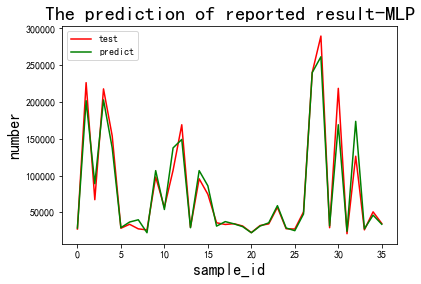

0.20722060893572167
[20879]


In [9]:
Y_sample = repoted_result
X_sample = numpy.array([date_label,wordle_freq,test_freq_col]).T
goal_MLP = numpy.array([[418],[goal1],[0.425992]]).T
MLP_prediction,MLP_test ,MLP_goal_prediction,MLP_rmse= MLP_sample_predict(X_sample,Y_sample,goal_MLP)
label = []
for i in range(len(MLP_test)):
    label.append(i)
MLP_prediction = MLP_prediction.tolist()
matplotlib.rcParams['font.family']='SimHei'
plt.plot(label,MLP_test,'r-',label="test")
plt.plot(label,MLP_prediction,'g-',label = "predict")
plt.xlabel("sample_id", fontdict={'size': 16})
plt.ylabel("number", fontdict={'size': 16})
plt.title("The prediction of reported result-MLP", fontdict={'size': 20})
plt.legend()
plt.show()
print(RMSE(normalize(MLP_test),normalize(MLP_prediction)))
print(MLP_goal_prediction)


c:\Users\10357\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


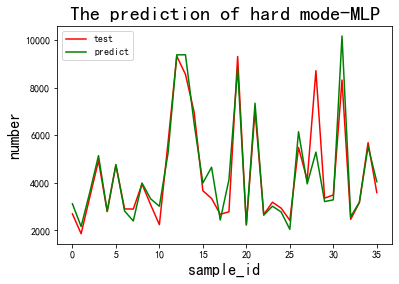

0.36067375660565726
[1919]


In [10]:
Y_sample = hard_mode
X_sample = numpy.array([date_label,wordle_freq,test_freq_col]).T
goal_MLP = numpy.array([[418],[goal1],[0.425992]]).T
MLP_prediction,MLP_test ,MLP_goal_prediction,MLP_rmse= MLP_sample_predict(X_sample,Y_sample,goal_MLP)
label = []
for i in range(len(MLP_test)):
    label.append(i)
MLP_prediction = MLP_prediction.tolist()
plt.figure()
plt.plot(label,MLP_test,'r-',label="test")
plt.plot(label,MLP_prediction,'g-',label = "predict")
plt.xlabel("sample_id", fontdict={'size': 16})
plt.ylabel("number", fontdict={'size': 16})
plt.title("The prediction of hard mode-MLP", fontdict={'size': 20})
plt.legend()
plt.show()
print(RMSE(normalize(MLP_test),normalize(MLP_prediction)))
print(MLP_goal_prediction)

c:\Users\10357\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


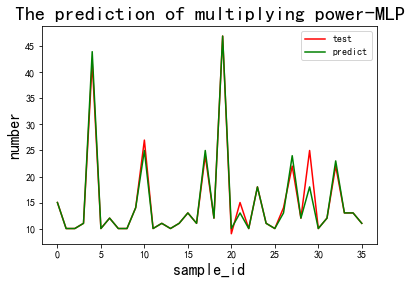

0.16080221833765276
[10]


In [11]:
Y_sample = []
for i in range(len(W1_relation)):
    Y_sample.append(int(W1_relation[i])) 
X_sample = numpy.array([date_label,wordle_freq,test_freq_col]).T
goal_MLP = numpy.array([[418],[goal1],[0.425992]]).T
MLP_prediction,MLP_test ,MLP_goal_prediction,MLP_rmse= MLP_sample_predict(X_sample,Y_sample,goal_MLP)
label = []
for i in range(len(MLP_test)):
    label.append(i)
MLP_prediction = MLP_prediction.tolist()
plt.figure()
plt.plot(label,MLP_test,'r-',label="test")
plt.plot(label,MLP_prediction,'g-',label = "predict")
plt.xlabel("sample_id", fontdict={'size': 16})
plt.ylabel("number", fontdict={'size': 16})
plt.title("The prediction of multiplying power-MLP", fontdict={'size': 20})
plt.legend()
plt.show()
print(RMSE(normalize(MLP_test),normalize(MLP_prediction)))
print(MLP_goal_prediction)

15097.926233352628


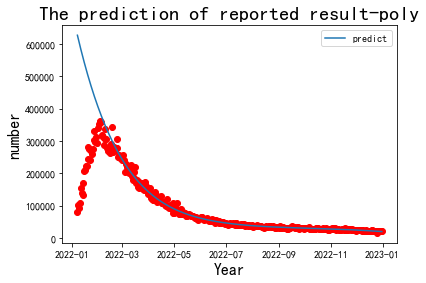

In [12]:
x = []
y = []
for i in range (49,data_length):
    x.append(date_label[i])
    y.append(repoted_result[i])
report_pred_model = polyfit(x,y,6)
model = numpy.poly1d(report_pred_model)
print(model(418))
plt.figure()
plt.scatter(Date_col,repoted_result,c = 'red')
plt.plot(Date_col,polyval(report_pred_model,date_label),'-',label = 'predict')
plt.xlabel("Year", fontdict={'size': 16})
plt.ylabel("number", fontdict={'size': 16})
plt.title("The prediction of reported result-poly", fontdict={'size': 20})
plt.legend()
plt.show()

1655.0124622668882


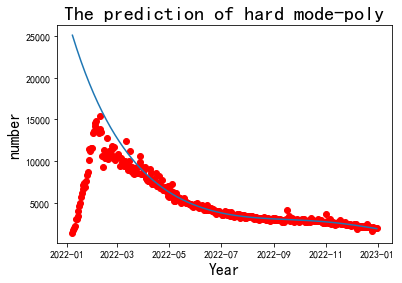

In [13]:

x = []
y = []
for i in range (84,data_length):
    x.append(date_label[i])
    y.append(hard_mode[i])
hard_pred_model = polyfit(x,y,6)
model = numpy.poly1d(hard_pred_model)
print(model(418))
plt.figure()
plt.scatter(Date_col,hard_mode,c = 'red')
plt.plot(Date_col,polyval(hard_pred_model,date_label),'-',label = 'predict')
plt.xlabel("Year", fontdict={'size': 16})
plt.ylabel("number", fontdict={'size': 16})
plt.title("The prediction of hard mode-poly", fontdict={'size': 20})
plt.show()

10.285504071199618


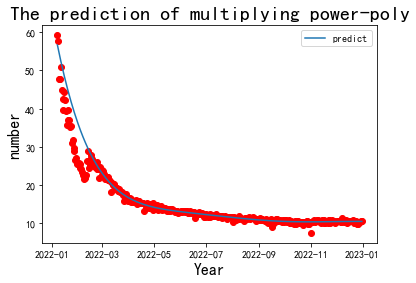

In [14]:
x = []
y = []
for i in range (45,data_length):
    x.append(date_label[i])
    y.append(W1_relation[i])
W1_pred_model = polyfit(x,y,6)
model = numpy.poly1d(W1_pred_model)
print(model(418))
plt.figure()
plt.scatter(Date_col,W1_relation,c = 'red')
plt.plot(Date_col,polyval(W1_pred_model,date_label),'-',label = 'predict')
plt.xlabel("Year", fontdict={'size': 16})
plt.ylabel("number", fontdict={'size': 16})
plt.title("The prediction of multiplying power-poly", fontdict={'size': 20})
plt.legend()
plt.show()

In [15]:
x = []
y = []
for i in range (200,data_length):
    x.append(date_label[i])
    y.append(repoted_result[i])
predict = polyval(report_pred_model,x)
y = normalize(y)
predict = normalize(predict)
rmse_report = RMSE(y,predict)
print(rmse_report)
x = []
y = []
for i in range (250,data_length):
    x.append(date_label[i])
    y.append(hard_mode[i])
predict = polyval(hard_pred_model,x)
y = normalize(y)
predict = normalize(predict)
rmse_hard = RMSE(y,predict)
print(rmse_hard)
x = []
y = []
for i in range (130,data_length):
    x.append(date_label[i])
    y.append(W1_relation[i])
predict = polyval(W1_pred_model,x)
y = normalize(y)
predict = normalize(predict)
rmse_W1 = RMSE(y,predict)
print(rmse_W1)

0.33027511195995124
0.5260767263009725
0.3728775271282087


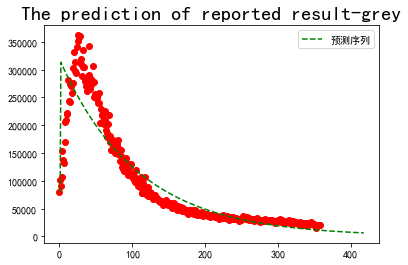

0.4121179966968996
6365.78570632264


In [16]:
#grey prediction
def grey_prediction(input):
    x = numpy.array(input)
    sigma = x[:-1]/x[1:]
    bound1 = [sigma.min(),sigma.max()]
    bound2 = [numpy.exp(-2/(x.size+1)),numpy.exp(2/(x.size+1))]
    sum = numpy.cumsum(x)
    z1 = (sum[:-1]+sum[1:])/2.0
    X = numpy.vstack([-z1,numpy.ones(x.size-1)]).T
    Y = x[1:].T
    #get u
    u = numpy.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    const = u[1]/u[0]
    #prediction model
    model = [x[0]]
    k = 1
    while k < len(x)+60:
        model.append((x[0] - const)*math.exp(-u[0]*k)+const)
        k+=1
    #do prediction
    x_pred = [x[0]]
    k = 1
    while k < len(x)+60:
        x_pred.append(model[k]-model[k-1])
        k+=1
    return x_pred,model,u
def error_function(original,predict):
    return abs(original[1:]-predict[:-1])/original[1:]
predict1,model1,u1 = grey_prediction(repoted_result)
predict2,model2,u2 = grey_prediction(hard_mode)
predict3,model3,u3 = grey_prediction(W1_relation)
x_model1 = predict1
x_model1.insert(0,repoted_result[0])
matplotlib.rcParams['font.family']='SimHei'
plt.scatter(date_label,repoted_result,c = 'red')
plt.plot(pred_date_label,x_model1[:-1],'g--',label='预测序列')
plt.title("The prediction of reported result-grey", fontdict={'size': 20})
plt.legend()
plt.show()
print(RMSE(normalize(repoted_result),normalize(x_model1[:359])))
#now we do prediction on it :
print(x_model1[len(pred_date_label)-1])

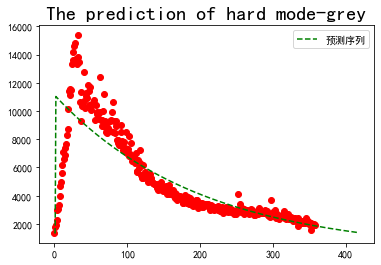

0.562490124425902
1380.1018142355606


In [17]:
x_model2 = predict2
x_model2.insert(0,hard_mode[0])
matplotlib.rcParams['font.family']='SimHei'
plt.scatter(date_label,hard_mode,c = 'red')
plt.plot(pred_date_label,x_model2[:-1],'g--',label='预测序列')
plt.title("The prediction of hard mode-grey", fontdict={'size': 20})
plt.legend()
plt.show()
#now we do prediction on it :
print(RMSE(normalize(hard_mode),normalize(x_model2[:359])))
print(x_model2[len(pred_date_label)-1])

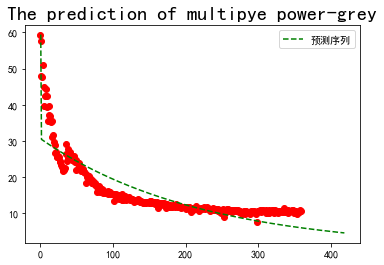

0.47575155021979726
4.533921747208296


In [18]:
x_model3 = predict3
x_model3.insert(0,W1_relation[0])
matplotlib.rcParams['font.family']='SimHei'
plt.scatter(date_label,W1_relation,c = 'red')
plt.plot(pred_date_label,x_model3[:-1],'g--',label='预测序列')
plt.title("The prediction of multipye power-grey", fontdict={'size': 20})
plt.legend()
plt.show()
#now we do prediction on it :
print(RMSE(normalize(W1_relation),normalize(x_model3[:359])))
print(x_model3[len(pred_date_label)-1])

# Problem 2


In [19]:
#now we operatie on the data we collect
'''
The data we collect contains the words more than 5 characters or less than 5 characters and we need to filterate it
The word_col is the column that contains all the words we collect
'''
def exp_data_read1(cols):
    data = pd.read_excel('output2.xlsx',usecols=[cols]).values
    output = []
    for i in range(len(data)):
        output.append(data[i][0])
    return output

exp_ori_word_col = exp_data_read1(0)
exp_ori_word_freq_col = exp_data_read1(1)
exp_ori_word_difficulty_col = exp_data_read1(2)
exp_ori_word_rate_col = exp_data_read1(3)


In [20]:
'''
The character frequency 
The data come from website
'''
def exp_data_read2(cols):
    data = pd.read_excel('character_freq.xlsx',usecols=[cols]).values
    output = []
    for i in range(1,len(data)):
        output.append(data[i][0])
    return output
character_col = exp_data_read2(0)
character_freq = exp_data_read2(1)

In [21]:
id_list = []
exp_word_col = []
exp_word_freq_col = []
exp_word_difficulty_col = []
exp_word_rate_col = []
exp_data_length = len(exp_ori_word_col)
for i in range(exp_data_length):
    if type(exp_ori_word_col[i]) == float:
        continue
    else:
        if len(exp_ori_word_col[i]) == 5:
            exp_word_col.append(exp_ori_word_col[i])
            exp_word_freq_col.append(exp_ori_word_freq_col[i])
            exp_word_difficulty_col.append(exp_ori_word_difficulty_col[i])
            exp_word_rate_col.append(exp_ori_word_rate_col[i])
exp_data_length = len(exp_word_col)


In [22]:
exp_difficulty_mean = numpy.mean(exp_word_difficulty_col)
exp_freq_mean = numpy.mean(exp_word_freq_col)
exp_rate_mean = numpy.mean(exp_word_rate_col)

In [23]:
num = 0
word_difficulty_col = []
word_freq_col = []
word_rate_col = []
for m in range(data_length):
    not_find = True
    for i in range(exp_data_length):
        if Word_col[m] == exp_word_col[i]:
            word_difficulty_col.append(exp_word_difficulty_col[i])
            word_freq_col.append(exp_word_freq_col[i])
            word_rate_col.append(exp_word_rate_col[i])
            not_find = False
    if not_find :
        word_difficulty_col.append(exp_difficulty_mean)
        word_freq_col.append(exp_difficulty_mean)
        word_rate_col.append(exp_difficulty_mean)


In [24]:
#difficulty judgement
def difficult(tries,i):
    output = 0
    for m in range(7):
        output += pow(2,m)*tries[m][i]/100
    return output 
difficult_label = []
for i in range(data_length):
    difficult_label.append(difficult(tries,i))

In [25]:
# Now we count do word analysis
def repeated_character_word(word):
    temp = []
    repeat = 0
    for i in range(len(word)):
        breakout = True
        for m in range(len(temp)):
            if word[i] == temp[m]:
                if word[i] == word[i-1]:
                    repeat += 4                
                elif word[i] == word[i-2]:
                    repeat += 2
                elif word[i] == word[i-3]:
                    repeat += 2
                elif word[i] == word[i-4]:
                    repeat += 2
                breakout = False
        if breakout:
            temp.append(word[i])
    return repeat

def vowel_number(word):
    vowel = ['a','e','i','o','u']
    num = 0
    for i in range(len(word)):
        for m in  range(len(vowel)):
            if vowel[m] == word[i]:
                num += 1
    return num
def alpha_freq(word):
    result = 0
    for i in range(len(word)):
        for m in range(len(character_freq)):
            if word[i] == character_col[m]:
                result+=character_freq[m]
    return result
#calculate repeated number
repeat_col = []
vowel_col = []
freq_col = []
for i in range(data_length):
    if len(Word_col[i]) == 5:
        repeat_col.append(repeated_character_word(Word_col[i]))
    else:
        repeat_col.append(0)

#calculate vowel number
for i in range(data_length):
    vowel_col.append(vowel_number(Word_col[i]))
#calculate frequency number:
for i in range (data_length):
    freq_col.append(alpha_freq(Word_col[i]))


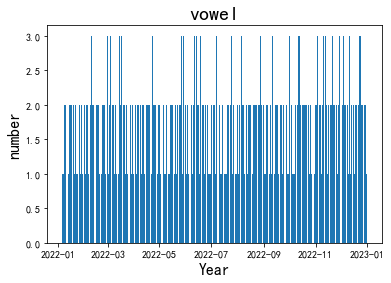

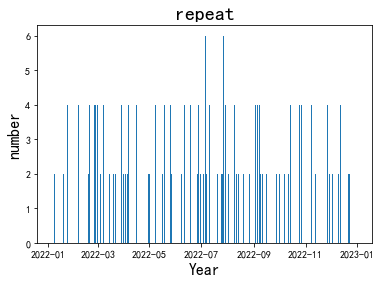

In [26]:

plt.figure()
plt.bar(Date_col,vowel_col)
plt.xlabel("Year", fontdict={'size': 16})
plt.ylabel("number", fontdict={'size': 16})
plt.title("vowel", fontdict={'size': 20})
plt.show()
plt.figure()
plt.bar(Date_col,repeat_col)
plt.xlabel("Year", fontdict={'size': 16})
plt.ylabel("number", fontdict={'size': 16})
plt.title("repeat", fontdict={'size': 20})
plt.show()


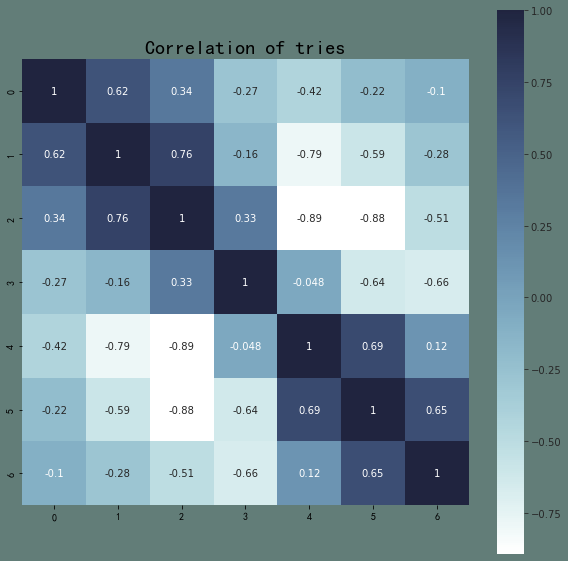

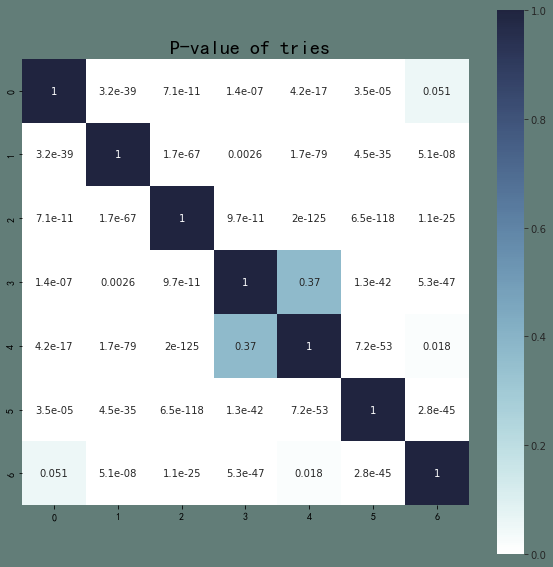

In [27]:
#calculate correlation
mat = numpy.array([tries[0],tries[1],tries[2],tries[3],tries[4],tries[5],tries[6]]).T
mat_temp = pd.DataFrame(mat)
matrix = mat_temp.corr()
mask = numpy.zeros_like(matrix)
mask[numpy.triu_indices_from(mask)] = True
plt.subplots(figsize=(10,10),facecolor="#627D78")
cmap = sns.cubehelix_palette(rot=-0.2, as_cmap=True, light=1)
# sns.heatmap(matrix,cmap= "Pastel2",annot=True,square=True )
with sns.axes_style("white"):
    sns.heatmap(matrix,cmap= cmap,annot=True,square=True)
plt.title("Correlation of tries", fontdict={'size': 20})
plt.show()
mat_temp = pd.DataFrame(mat)
matrix = mat_temp.corr(method=GetPvalue_Pearson)
mask = numpy.zeros_like(matrix)
mask[numpy.triu_indices_from(mask)] = True
plt.subplots(figsize=(10,10),facecolor="#627D78")
# sns.heatmap(matrix,cmap= "Pastel2",annot=True,square=True )
with sns.axes_style("white"):
    sns.heatmap(matrix,cmap= cmap,annot=True,square=True)
plt.title(" P-value of tries", fontdict={'size': 20})
plt.show()

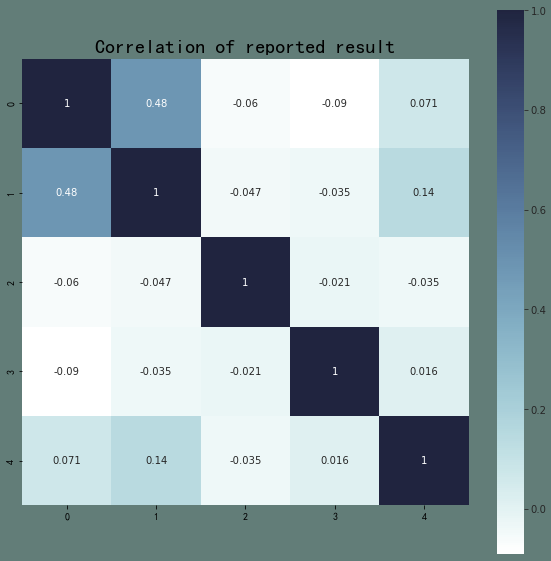

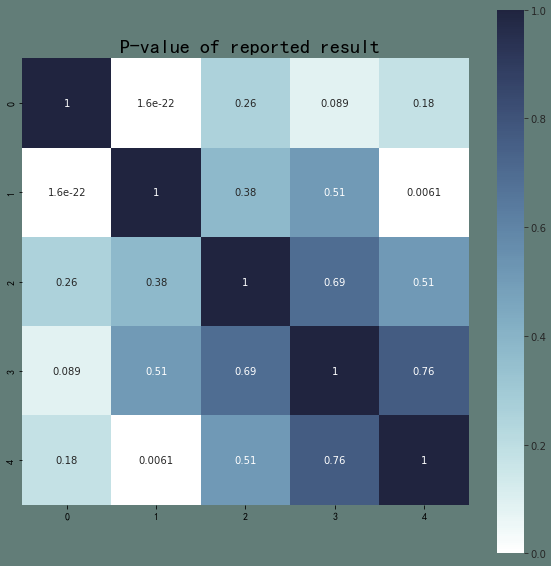

In [49]:
#calculate correlation
mat = numpy.array([W1_relation,hard_mode,repeat_col,vowel_col,test_freq_col]).T
mat_temp = pd.DataFrame(mat)
matrix = mat_temp.corr()
mask = numpy.zeros_like(matrix)
mask[numpy.triu_indices_from(mask)] = True
plt.subplots(figsize=(10,10),facecolor="#627D78")
cmap = sns.cubehelix_palette(rot=-0.2, as_cmap=True, light=1)
# sns.heatmap(matrix,cmap= "Pastel2",annot=True,square=True )
with sns.axes_style("white"):
    sns.heatmap(matrix,cmap= cmap,annot=True,square=True)
plt.title("Correlation of reported result", fontdict={'size': 20})
plt.show()
#calculate correlation
mat = numpy.array([W1_relation,hard_mode,repeat_col,vowel_col,test_freq_col]).T
mat_temp = pd.DataFrame(mat)
matrix = mat_temp.corr(method=GetPvalue_Pearson)
mask = numpy.zeros_like(matrix)
mask[numpy.triu_indices_from(mask)] = True
plt.subplots(figsize=(10,10),facecolor="#627D78")
# sns.heatmap(matrix,cmap= "Pastel2",annot=True,square=True )
with sns.axes_style("white"):
    sns.heatmap(matrix,cmap= cmap,annot=True,square=True)
plt.title(" P-value of reported result", fontdict={'size': 20})
plt.show()

c:\Users\10357\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


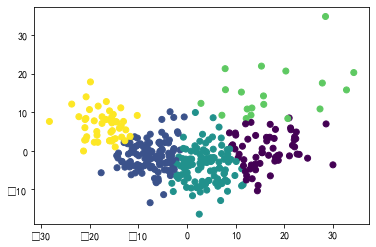

In [29]:
model = PCA(n_components=2)
features = numpy.zeros((data_length,7))
for m in range(7):
    for i in range(data_length):
        features[i][m] = tries[m][i]
difficult_pred = KMeans(n_clusters= 5,random_state= 9).fit_predict(features)
reduced_x = model.fit_transform(features)
plt.figure()
plt.scatter(reduced_x.T[0],reduced_x.T[1],c=difficult_pred)
plt.show()


        

17.181166666666666
10.659491525423729
13.235132743362833
23.67684210526316
8.404285714285715


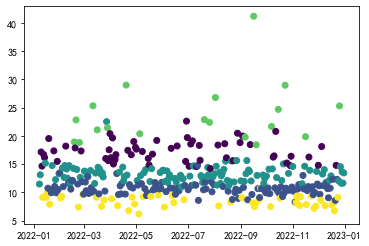

In [30]:
p1 = []
p2 = []
p3 = []
p4 = []
p5 = []
for i in range(data_length):
    if difficult_pred[i] == 0:
        p1.append(difficult_label[i])
    if difficult_pred[i] == 1:
        p2.append(difficult_label[i])
    if difficult_pred[i] == 2:
        p3.append(difficult_label[i])
    if difficult_pred[i] == 3:
        p4.append(difficult_label[i])
    if difficult_pred[i] == 4:
        p5.append(difficult_label[i])
print(numpy.mean(p1))
print(numpy.mean(p2))
print(numpy.mean(p3))
print(numpy.mean(p4))
print(numpy.mean(p5))
plt.figure()
plt.scatter(Date_col,difficult_label,c=difficult_pred)
plt.show()

In [31]:
'''
1 -- purple
2 -- yellow
3 -- blue
4 -- green
5 -- dark blue
'''
def cal_function(x):
    result = x
    return result
difficult_col = []
for i in range(data_length):
    if difficult_pred[i] == 0:
        difficult_col.append(cal_function(4))
    if difficult_pred[i] == 1:
        difficult_col.append(cal_function(1))
    if difficult_pred[i] == 2:
        difficult_col.append(cal_function(3))    
    if difficult_pred[i] == 3:
        difficult_col.append(cal_function(5))   
    if difficult_pred[i] == 4:
        difficult_col.append(cal_function(2))       


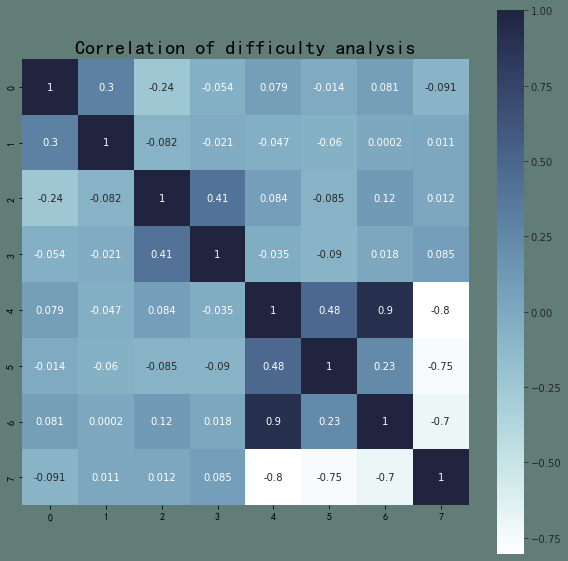

In [50]:

#calculate correlation
mat = numpy.array([difficult_label,repeat_col,freq_col,vowel_col,hard_mode,W1_relation,wordle_freq,date_label]).T
mat_temp = pd.DataFrame(mat)
matrix = mat_temp.corr()
mask = numpy.zeros_like(matrix)
mask[numpy.triu_indices_from(mask)] = True
plt.subplots(figsize=(10,10),facecolor="#627D78")
cmap = sns.cubehelix_palette(rot=-0.2, as_cmap=True, light=1)
# sns.heatmap(matrix,cmap= "Pastel2",annot=True,square=True )
with sns.axes_style("white"):
    sns.heatmap(matrix,cmap= cmap,annot=True,square=True)
plt.title("Correlation of difficulty analysis", fontdict={'size': 20})
plt.show()


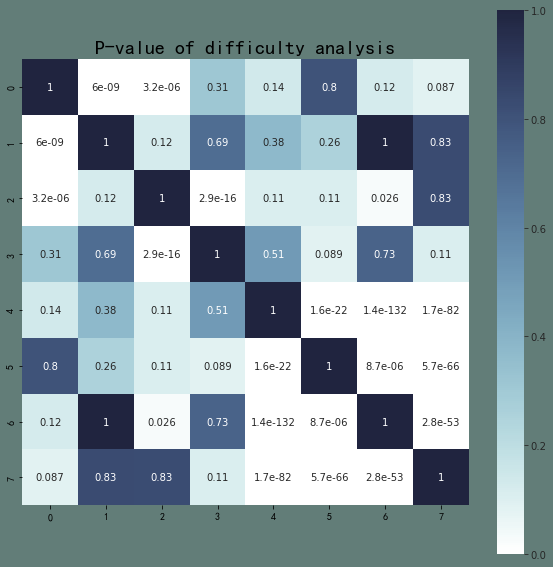

In [51]:
matrix = mat_temp.corr(method=GetPvalue_Pearson)
plt.subplots(figsize=(10,10),facecolor="#627D78")
with sns.axes_style("white"):
    sns.heatmap(matrix, cmap= cmap,annot=True,square=True)
plt.title("P-value of difficulty analysis", fontdict={'size': 20})
plt.show()

(7, 359)


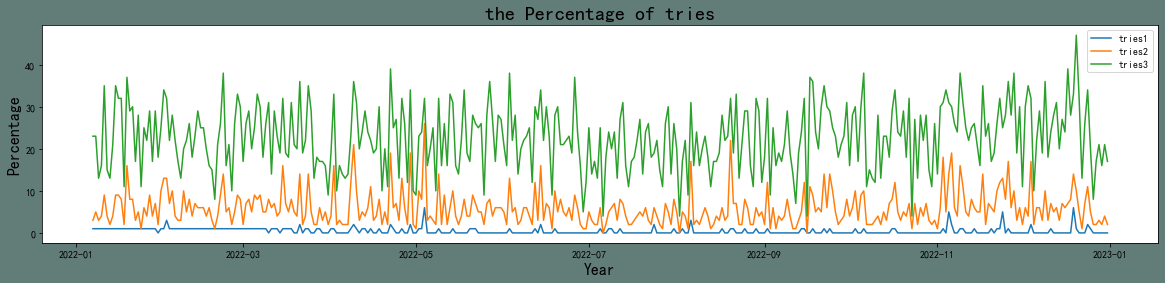

In [34]:
#now we do prediction on tries
#Let's plot the Timeseries
df = numpy.array(tries)
print(df.shape)
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6","#627D78",'#00FFFF','#A52A2A']
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=Date_col,y=tries[0],  palette=colors,label = 'tries1')
Time_series=sns.lineplot(x=Date_col,y=tries[1],  palette=colors,label = 'tries2')
Time_series=sns.lineplot(x=Date_col,y=tries[2],  palette=colors,label = 'tries3')
plt.xlabel("Year", fontdict={'size': 16})
plt.ylabel("Percentage", fontdict={'size': 16})
plt.title("the Percentage of tries", fontdict={'size': 20})
plt.legend()
plt.show()

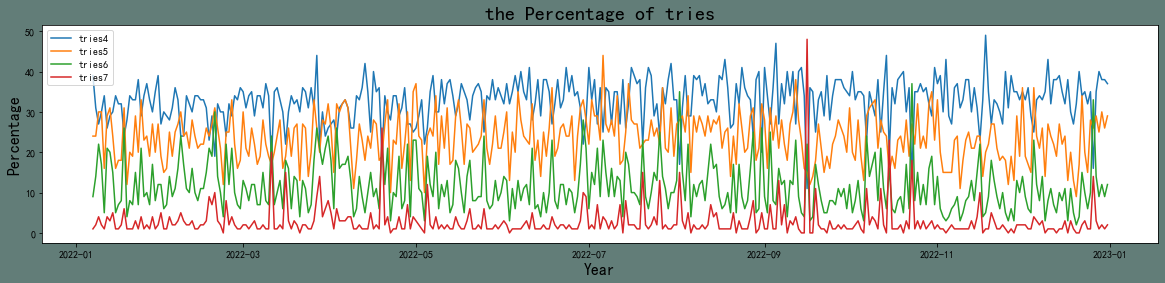

In [35]:
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=Date_col,y=tries[3],  palette=colors,label = 'tries4')
Time_series=sns.lineplot(x=Date_col,y=tries[4],  palette=colors,label = 'tries5')
Time_series=sns.lineplot(x=Date_col,y=tries[5],  palette=colors,label = 'tries6')
Time_series=sns.lineplot(x=Date_col,y=tries[6],  palette=colors,label = 'tries7')
plt.xlabel("Year", fontdict={'size': 16})
plt.ylabel("Percentage", fontdict={'size': 16})
plt.title("the Percentage of tries", fontdict={'size': 20})
plt.legend()
plt.show()

In [36]:
#do prediciton:
'''
We use GradientBoostingRegressor to do prediction
From the data above,we choose frequency and repeat number to do prediction
'''
#cut X and Y

def sample_predict(input,X_sample,goal_X):
    Y_sample = numpy.array(input)
    '''
    We devide the sample into two parts,test and train
    Because we don't have a large number of samples ,we choose KFOLD to make the prediction proform better
    '''
    #kf = KFold(n_splits=5,shuffle=True,random_state=0)
    X_train,X_test,Y_train,Y_test =train_test_split(X_sample,Y_sample,test_size=0.1)
    scalar = preprocessing.StandardScaler().fit(X_train)
    X_train = scalar.transform(X_train)
    X_test = scalar.transform(X_test)
    gdb_model = GradientBoostingClassifier(max_depth=5,max_leaf_nodes=None)
    gdb_model.fit(X_train,Y_train)
    prediction = gdb_model.predict(X_test)
    goal= gdb_model.predict(goal_X)
    curr_score = RMSE(normalize(Y_test),normalize(prediction))
    return prediction,Y_test,curr_score,goal



In [37]:
predict_list = []
test_list = []
score_list = []
goal_tries_list = []
MLP_pred = []
MLP_test_list = []
MLP_score_list = []
MLP_goal_tries_list = []
goal_x_list_MLP = [[418],[2.0],[0.425992]]
goal_x_list_GDB = [[418],[2.0],[0.425992]]
X_list = [date_label,repeat_col,freq_col]
for i in range(7):
    X_sample = numpy.array(X_list).T
    goal_X_MLP =numpy.asarray(goal_x_list_MLP).T
    goal_X_GDB =numpy.asarray(goal_x_list_GDB).T
    temp_gdb_pred,temp_gdb_test,temp_gdb_score,goal_gdb_Y = sample_predict(tries[i],X_sample,goal_X_GDB)
    MLP_prediction,MLP_test ,MLP_goal_prediction,MLP_rmse = MLP_sample_predict(X_sample,tries[i],goal_X_MLP)
    X_list.append(tries[i])
    goal_x_list_GDB.append(goal_gdb_Y.tolist())
    goal_x_list_MLP.append(MLP_goal_prediction.tolist())
    predict_list.append(temp_gdb_pred)
    test_list.append(temp_gdb_test)
    score_list.append(temp_gdb_score)
    goal_tries_list.append(goal_gdb_Y)
    MLP_pred.append(MLP_prediction)
    MLP_test_list.append(MLP_test)
    MLP_score_list.append(MLP_rmse)
    MLP_goal_tries_list.append(MLP_goal_prediction)
#draw the lines out
length = len(test_list[0])
x_label = []
for i in range(length):
    x_label.append(i)

c:\Users\10357\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\10357\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\10357\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

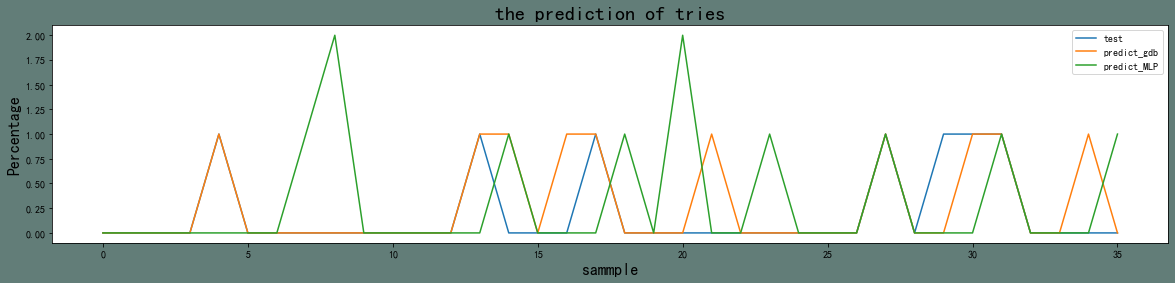

0.8538104986359801
1.3980143629507251


In [38]:
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=x_label,y=test_list[0],  palette=colors,label = "test")
Time_series=sns.lineplot(x=x_label,y=predict_list[0],  palette=colors,label = 'predict_gdb')
Time_series=sns.lineplot(x=x_label,y=MLP_pred[0],  palette=colors,label = 'predict_MLP')
plt.xlabel("sammple", fontdict={'size': 16})
plt.ylabel("Percentage", fontdict={'size': 16})
plt.title("the prediction of tries", fontdict={'size': 20})
plt.legend()
plt.show()
print(score_list[0])
print(MLP_score_list[0])

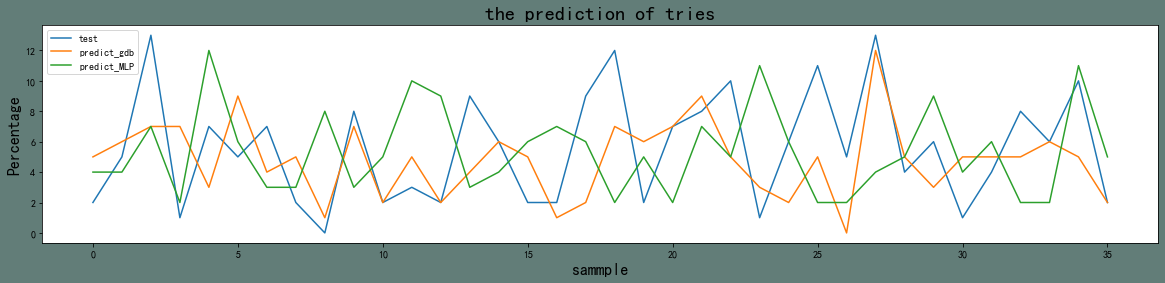

1.0562482642438
0.9069045862863804


In [39]:
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=x_label,y=test_list[1],  palette=colors,label = "test")
Time_series=sns.lineplot(x=x_label,y=predict_list[1],  palette=colors,label = 'predict_gdb')
Time_series=sns.lineplot(x=x_label,y=MLP_pred[1],  palette=colors,label = 'predict_MLP')
plt.xlabel("sammple", fontdict={'size': 16})
plt.ylabel("Percentage", fontdict={'size': 16})
plt.title("the prediction of tries", fontdict={'size': 20})
plt.legend()
plt.show()
print(score_list[1])
print(MLP_score_list[1])

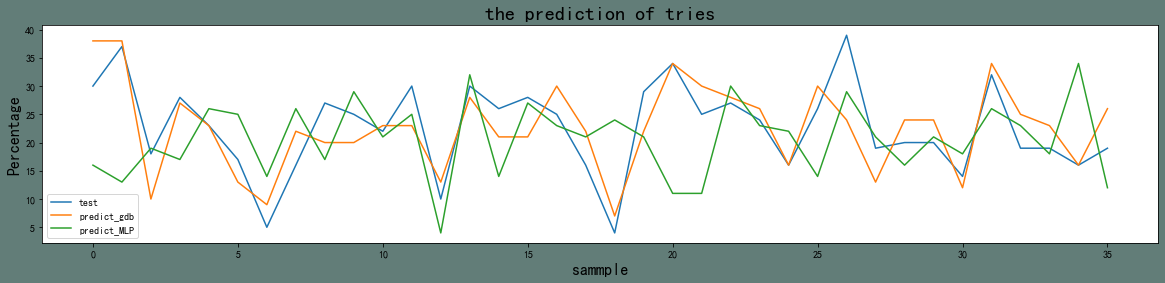

0.6721278749570915
0.9648109581058903


In [40]:
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=x_label,y=test_list[2],  palette=colors,label = "test")
Time_series=sns.lineplot(x=x_label,y=predict_list[2],  palette=colors,label = 'predict_gdb')
Time_series=sns.lineplot(x=x_label,y=MLP_pred[2],  palette=colors,label = 'predict_MLP')
plt.xlabel("sammple", fontdict={'size': 16})
plt.ylabel("Percentage", fontdict={'size': 16})
plt.title("the prediction of tries", fontdict={'size': 20})
plt.legend()
plt.show()
print(score_list[2])
print(MLP_score_list[2])

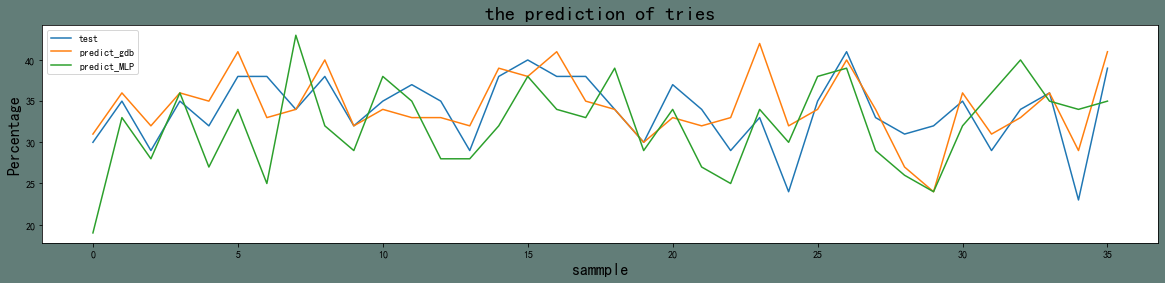

0.8376274185731156
0.7890771917608476


In [41]:
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=x_label,y=test_list[3],  palette=colors,label = "test")
Time_series=sns.lineplot(x=x_label,y=predict_list[3],  palette=colors,label = 'predict_gdb')
Time_series=sns.lineplot(x=x_label,y=MLP_pred[3],  palette=colors,label = 'predict_MLP')
plt.xlabel("sammple", fontdict={'size': 16})
plt.ylabel("Percentage", fontdict={'size': 16})
plt.title("the prediction of tries", fontdict={'size': 20})
plt.legend()
plt.show()
print(score_list[3])
print(MLP_score_list[3])

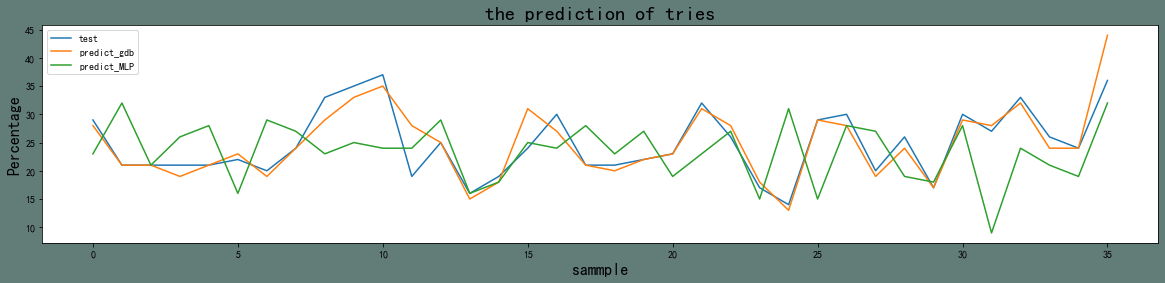

0.4450835639716996
0.5571507663615588


In [42]:
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=x_label,y=test_list[4],  palette=colors,label = "test")
Time_series=sns.lineplot(x=x_label,y=predict_list[4],  palette=colors,label = 'predict_gdb')
Time_series=sns.lineplot(x=x_label,y=MLP_pred[4],  palette=colors,label = 'predict_MLP')
plt.xlabel("sammple", fontdict={'size': 16})
plt.ylabel("Percentage", fontdict={'size': 16})
plt.title("the prediction of tries", fontdict={'size': 20})
plt.legend()
plt.show()
print(score_list[4])
print(MLP_score_list[4])

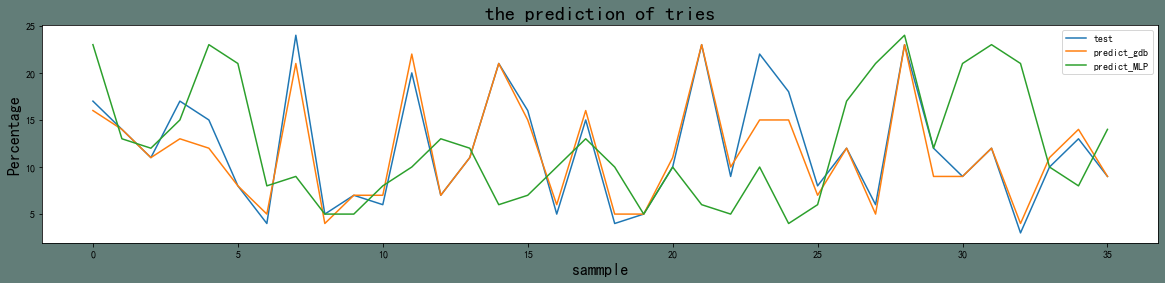

0.2934774485384733
0.2098586711125574


In [43]:
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=x_label,y=test_list[5],  palette=colors,label = "test")
Time_series=sns.lineplot(x=x_label,y=predict_list[5],  palette=colors,label = 'predict_gdb')
Time_series=sns.lineplot(x=x_label,y=MLP_pred[5],  palette=colors,label = 'predict_MLP')
plt.xlabel("sammple", fontdict={'size': 16})
plt.ylabel("Percentage", fontdict={'size': 16})
plt.title("the prediction of tries", fontdict={'size': 20})
plt.legend()
plt.show()
print(score_list[5])
print(MLP_score_list[5])

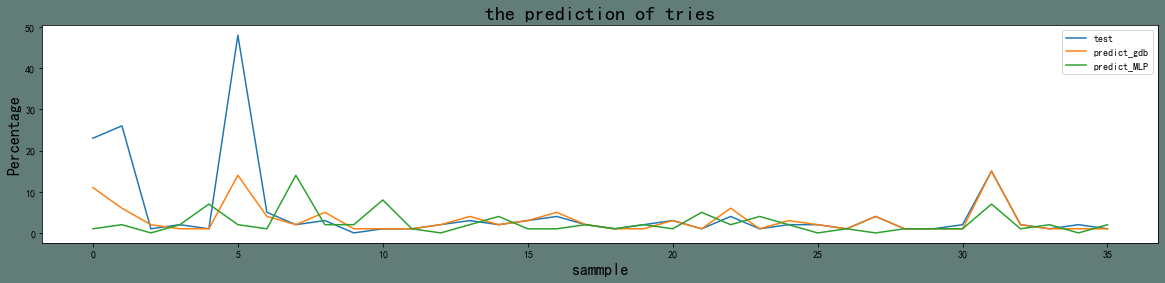

0.6061864896809834
0.3039580669129974


In [44]:
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=x_label,y=test_list[6],  palette=colors,label = "test")
Time_series=sns.lineplot(x=x_label,y=predict_list[6],  palette=colors,label = 'predict_gdb')
Time_series=sns.lineplot(x=x_label,y=MLP_pred[6],  palette=colors,label = 'predict_MLP')
plt.xlabel("sammple", fontdict={'size': 16})
plt.ylabel("Percentage", fontdict={'size': 16})
plt.title("the prediction of tries", fontdict={'size': 20})
plt.legend()
plt.show()
print(score_list[6])
print(MLP_score_list[6])

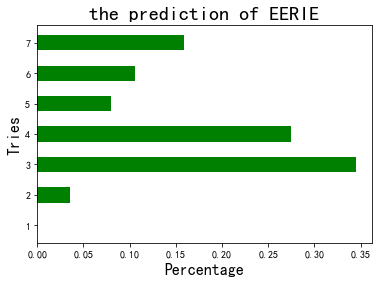

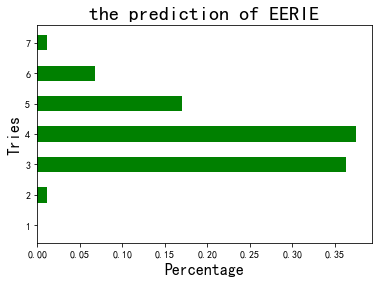

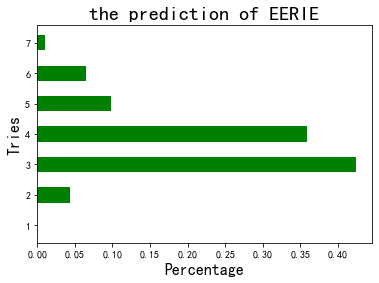

[0.0, 0.035398230088495575, 0.34513274336283184, 0.2743362831858407, 0.07964601769911504, 0.10619469026548672, 0.1592920353982301]
[0.0, 0.011363636363636364, 0.36363636363636365, 0.375, 0.17045454545454544, 0.06818181818181818, 0.011363636363636364]
[0.0, 0.043478260869565216, 0.42391304347826086, 0.358695652173913, 0.09782608695652174, 0.06521739130434782, 0.010869565217391304]


In [45]:
#now we get the goal:
goal_gdb = []
goal_MLP = []
goal_mix = []
label = []
sum_gdb = sum_MLP = sum_mix = 0
for i in goal_tries_list:
    i = i.tolist()
    goal_gdb.append(i[0])
    sum_gdb += i[0]
for i in MLP_goal_tries_list:
    i = i.tolist()
    goal_MLP.append(i[0])
    sum_MLP += i[0]
goal_mix_ori = [goal_tries_list[0].tolist()[0],goal_tries_list[1].tolist()[0],goal_tries_list[2].tolist()[0],MLP_goal_tries_list[3].tolist()[0],goal_tries_list[4].tolist()[0],MLP_goal_tries_list[5].tolist()[0],MLP_goal_tries_list[6].tolist()[0]]  
for i in range(7):
    sum_mix +=goal_mix_ori[i]
for i in range(7):
    goal_gdb[i] /= sum_gdb
    goal_MLP[i] /= sum_MLP 
    goal_mix.append(goal_mix_ori[i]/sum_mix)
    label.append(i+1)

plt.figure()
plt.barh(label,goal_gdb,height=0.5, color='g', alpha=1)
plt.xlabel("Percentage", fontdict={'size': 16})
plt.ylabel("Tries", fontdict={'size': 16})
plt.title("the prediction of EERIE", fontdict={'size': 20})
plt.show()
plt.figure()
plt.barh(label,goal_MLP,height=0.5, color='g', alpha=1)
plt.xlabel("Percentage", fontdict={'size': 16})
plt.ylabel("Tries", fontdict={'size': 16})
plt.title("the prediction of EERIE", fontdict={'size': 20})
plt.show()
plt.barh(label,goal_mix,height=0.5, color='g', alpha=1)
plt.xlabel("Percentage", fontdict={'size': 16})
plt.ylabel("Tries", fontdict={'size': 16})
plt.title("the prediction of EERIE", fontdict={'size': 20})
plt.show()
print(goal_gdb)
print(goal_MLP)
print(goal_mix)


# Problem 3

c:\Users\10357\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


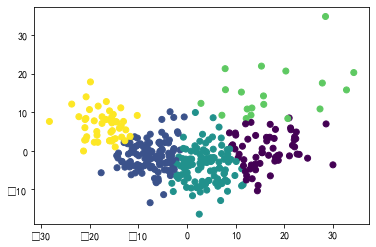

In [46]:
'''
We use kmeans to get the difficulty and now we need to use knn to do classifier
'''
def O_distance(x,y):
    distance = 0
    for i in range(len(x)):
        distance += (x[i]-y[i])**2
    return distance
PCA_model = PCA(n_components=2)
features = numpy.array([tries[0],tries[1],tries[2],tries[3],tries[4],tries[5],tries[6]]).T
Kmeans_pred = KMeans(n_clusters= 5,random_state= 9).fit_predict(features)
reduced_x = PCA_model.fit_transform(features)
plt.figure()
plt.scatter(reduced_x.T[0],reduced_x.T[1],c=Kmeans_pred)
plt.show()



In [47]:
'''
Because we need to do judgement on the model we need to calculate the accuracy
'''
#We cut the data into two parts:train and test
X_train,X_test,Y_train,Y_test =train_test_split(features,Kmeans_pred,test_size=0.1)
model = KNN(n_neighbors=6)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print(accuracy_score(Y_test,pred))

0.9722222222222222


In [48]:
model = KNN(n_neighbors=6)
model.fit(features,difficult_pred)
input = numpy.array(MLP_goal_tries_list).T
pred = model.predict(input)
print(pred)

[1]
